## Change in the Friction Coefficient of F1 tires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

# read data.json
with open("data.json", "r") as f:
    Racing_data = json.load(f)


In [5]:

## Remove speed from the data
for driver in Racing_data:
    for lap in Racing_data[driver]:
        if "speed" in Racing_data[driver][lap]:
            del Racing_data[driver][lap]["speed"]
        elif "distance" in Racing_data[driver][lap]:
            Racing_data[driver][lap]["distance"] = np.array(Racing_data[driver][lap]["distance"])
        elif "time" in Racing_data[driver][lap]:
            Racing_data[driver][lap]["time"] = np.array(Racing_data[driver][lap]["time"])
print(Racing_data)
print("Keys in Racing_data:", Racing_data["VER"]["49"].keys())


{'VER': {'49': {'time': [0.0, 0.165, 0.18, 0.34, 0.445, 0.62, 0.759, 0.805, 1.005, 1.059, 1.139, 1.359, 1.405, 1.605, 1.639, 1.805, 1.939, 2.085, 2.3, 2.32, 2.405, 2.645, 2.68, 2.965, 3.08, 3.205, 3.22, 3.365, 3.38, 3.64, 3.725, 3.8, 3.925, 4.125, 4.445, 4.619, 4.72, 4.765, 4.899, 5.099, 5.125, 5.325, 5.339, 5.526, 5.56, 5.739, 5.885, 6.045, 6.1, 6.285, 6.36, 6.565, 6.66, 6.765, 6.9, 6.925, 7.139, 7.205, 7.379, 7.565, 7.619, 7.765, 7.859, 7.925, 8.205, 8.3, 8.565, 8.6, 8.725, 8.86, 9.045, 9.16, 9.4, 9.405, 9.46, 9.725, 9.8, 9.925, 10.02, 10.125, 10.22, 10.42, 10.565, 10.64, 10.72, 10.805, 10.981, 11.005, 11.205, 11.24, 11.5, 11.525, 11.899, 11.965, 12.179, 12.286, 12.519, 12.605, 12.94, 13.005, 13.099, 13.445, 13.46, 13.605, 13.7, 13.845, 13.919, 14.02, 14.045, 14.245, 14.26, 14.485, 14.5, 14.78, 14.805, 14.965, 15.1, 15.205, 15.42, 15.485, 15.86, 15.885, 16.02, 16.205, 16.405, 16.46, 16.605, 16.68, 16.925, 17.12, 17.165, 17.28, 17.525, 17.58, 17.879, 17.925, 18.04, 18.085, 18.199, 18.

## Introduction

(imagine we have a cool introduction here about F1 tires and how the friction changes for different laps)

### Available data:

The data is structured as follows:

`Racing_data` is a dictionary containing all the racers.

`Racing_data['Racer']` is another dictionary containing the laps 49 through 52 of the racer.

`Racing_data['Racer']['Lap']` is yet another dictionary containing:

- `Time`: np.array of the time taken for each lap.
- `Distance`: np.array of the distance covered in each lap.

In order to see all the racers, you can use the following code:

```python
print(Racing_data.keys())
```
In order to get the laps of a racer, you can use the following code:

```python
print(Racing_data['VER'].keys()) ## This will print the laps of the racer 'Verstappen'
```

And to view the data of a specific lap, you can use:

```python
print(Racing_data['VER']['49']) ## This will print the data of lap 49
```

## 1) Find the average speed through a corner

The course has 18 corners, as shown in the figure below:

![British Grand Prix Circuit with Corners](Racing_track.png)


We are going to use corner 15 to calculate the friction coefficient of the tires. The reason for corner 15, is that prior to the corner, there is a long straight, which allows the car to reach high speeds. After the corner, there is another long straight, which allows the car to reach high speeds again. This allows for the assumption that the only limitation the drivers face in corner 15 is the friction coefficient of the tires. 

### 1a) Find the average speed through corner 15
The data you have available is the distance and time of the lap. Corner 15 starts at 4840m into the lap and ends at 5150m into the lap.

Write a function that inputs the distance and time arrays, and returns the average speed through corner 15.

 

In [6]:
start_of_corner_15 = 4840
end_of_corner_15 = 5150

def average_velocity(distance: np.ndarray, time: np.ndarray, start:float, end:float) -> float:
    """

    Calculate the average velocity over a specified distance range.

    Parameters
    ----------
    distance: numpy array of distances\\
    time: numpy array of time stamps\\
    start: start distance\\
    end: end distance
    
    Returns
    -------
    average_velocity: float
        The average velocity over the specified distance range.

    """


    start_idx = np.where(distance >= start)[0][0]
    end_idx = np.where(distance <= end)[0][-1]
    velocities = []
    for i in range(start_idx, end_idx):
        velocities.append((distance[i + 1] - distance[i]) / (time[i + 1] - time[i]))
    
    average_velocity = np.mean(velocities)


    return average_velocity

print("Average velocity in the corner:", average_velocity(
    Racing_data["VER"]["49"]["distance"],
    Racing_data["VER"]["49"]["time"],
    start=start_of_corner_15,
    end=end_of_corner_15
))


    

Average velocity in the corner: 68.3455599281489


### 1b) Radius of corner 15

In this exercise we will assume that corner 15 is a perfect half circle. So, the next thing we need is to calculate the radius of corner 15, assuming the start and end points of the corner, are the start and end points of the half circle.

In [30]:
g = 9.81
r = (end_of_corner_15 - start_of_corner_15) / np.pi
print("Radius of corner 15:", r)


Radius of corner 15: 98.6760647169751


### 1c) Visualize the velocities

Now we have the first building blocks we need to calculate the friction coefficient of the tires. Before we proceed, let us visualize the velocities of all the racers through corner 15.

Create a scatter plot of the velocities with the x-axis being the lap number and the y-axis being the average velocity (in m/s) through corner 15

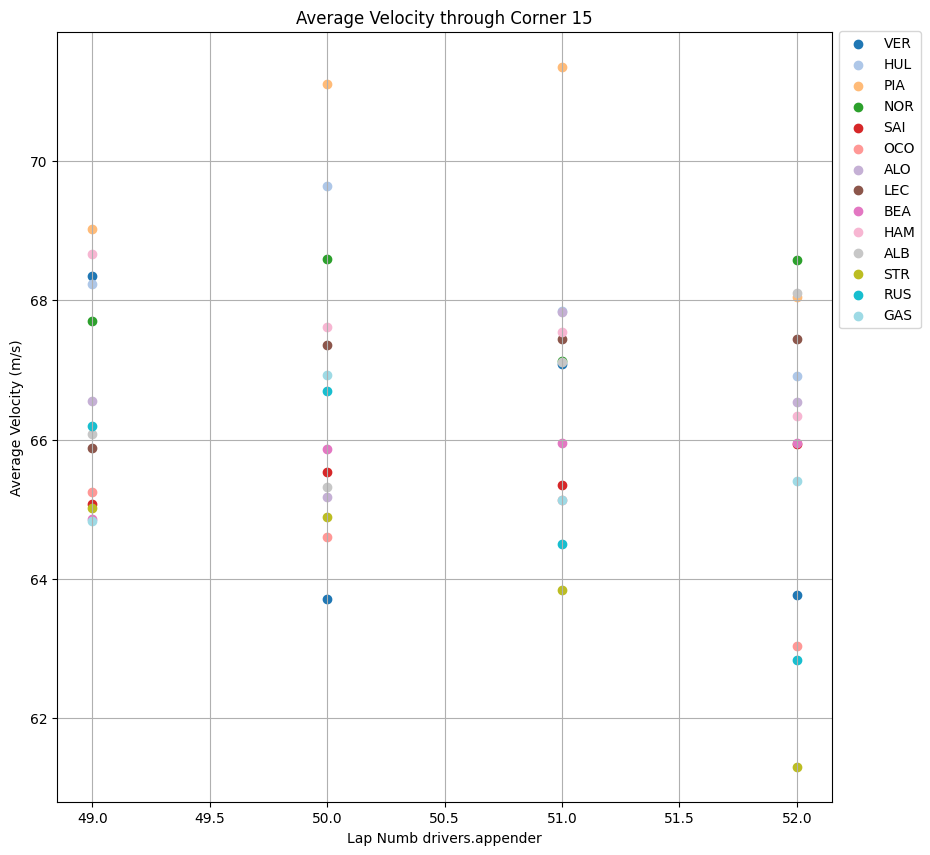

In [8]:
colors = plt.cm.tab20(np.linspace(0, 1, len(Racing_data)))

plt.figure(figsize=(10, 10))
for i, driver in enumerate(Racing_data):
    color = colors[i]  
    for lap in Racing_data[driver]:
        velocity = average_velocity(
            Racing_data[driver][lap]["distance"],
            Racing_data[driver][lap]["time"],
            start=start_of_corner_15,
            end=end_of_corner_15
        )
        plt.scatter(int(lap), velocity, color=color, label=driver if lap == "49" else "")
   
plt.xlabel("Lap Numb drivers.appender")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.legend(ncol=1, bbox_to_anchor=(1, 1.01))
plt.grid()
plt.show()


## 2) Calculate the friction coefficient 


### 2a) Finding friction

To find the friction coefficient, we have made some important assumptions:
1. The car is moving in a perfect half circle.
2. The ground is flat.
3. The driver is driving at maximum velocity, which the wheels can handle without slipping.

The third assumption allows us to use the formula for centripetal acceleration $a_c = \frac{v^2}{r}$, in order to find the friction coefficient $μ$.
Since the driver is driving at maximum velocity, at which the wheels can handle without slipping, we can say that the centripetal force, $F_c = ma _c$, is equal to the friction force, $F_f = μ N$. In other words, we can use Newtons third law to say that the centripetal force must equal to the friction force.

Find an expression for the friction coefficient $μ$, dependent on the average velocity, the radius and the mass.

Solution: 
$$
μ = \frac{v^2}{g r}
$$

### 2b) Linear Regression (Ordinary Least Squares)

Now that we have found a formula for the friction coefficient $μ$, we want to investigate whetehr it changes over time. In other words, does $μ$ vary with lap number?

To explore this, we use a linear model:
$$
μ = β ⋅ \text{Lap} + β_0
$$
Taken from the standard linear regression form:
$$
y = β X + ϵ
$$

Where $y$ is the target variable (friction coefficient), $X$ is the input variable (lap number), $β$ is the slope of the line, and $ϵ$ is the error term.

The OLS solution for the slope $β$ is in matrix form:
$$
β = X^T y(X^T X)^{-1}
$$
or in scalar form:
$$
β = \frac{Σ_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{Σ_{i=1}^{n} (x_i - \bar{x})^2}
$$

In matrix form the design matrix $X$ will return us the $β$ coefficient, which contains both the slope and the intercept. The design matrix $X$ is defined as:
$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$
where $x_i$ is the lap number.

If you chose to use the scalar form, you will need to calculate the intercept separately:
$$
β_0 = \bar{y} - β \bar{x}
$$

In the cell below, complete the code for OLS linear regression, and consider the coefficients.

In [47]:
#First create design matrix
lap_numbers = sorted([int(lap) for lap in Racing_data["VER"].keys()])
drivers = list(Racing_data.keys())

X = []
y = []

for lap in lap_numbers:
    mu_array = []
    for driver in drivers:

        velocity = average_velocity(
            Racing_data[driver][str(lap)]["distance"],
            Racing_data[driver][str(lap)]["time"],
            start=start_of_corner_15,
            end=end_of_corner_15
        )

        mu = velocity**2 / (g * r)
        mu_array.append(mu)
    
    X.append([1, lap])  # Intercept term and lap number
    y.append(np.mean(mu_array))  # Average friction coefficient for the lap

X = np.array(X) #convert to numpy array
y = np.array(y) #convert to numpy array

# Now do the OLS calculation
beta = np.linalg.inv(X.T @ X) @ X.T @ y #calculate the beta coefficients

print("Coefficients (beta):", beta)

Coefficients (beta): [ 6.21210548 -0.03275894]


### 2c) Plot the results
You should now plot the results of the linear regression. The x-axis should be the lap number, and the y-axis should be the friction coefficient. Plot the linear regression line on top of a scatter plot of the friction coefficients.

You can easily scatter the individual friction coefficients by copying the velocity scatter plot and squaring velocities, and multiply by a factor of $\frac{1}{g\cdot r}$

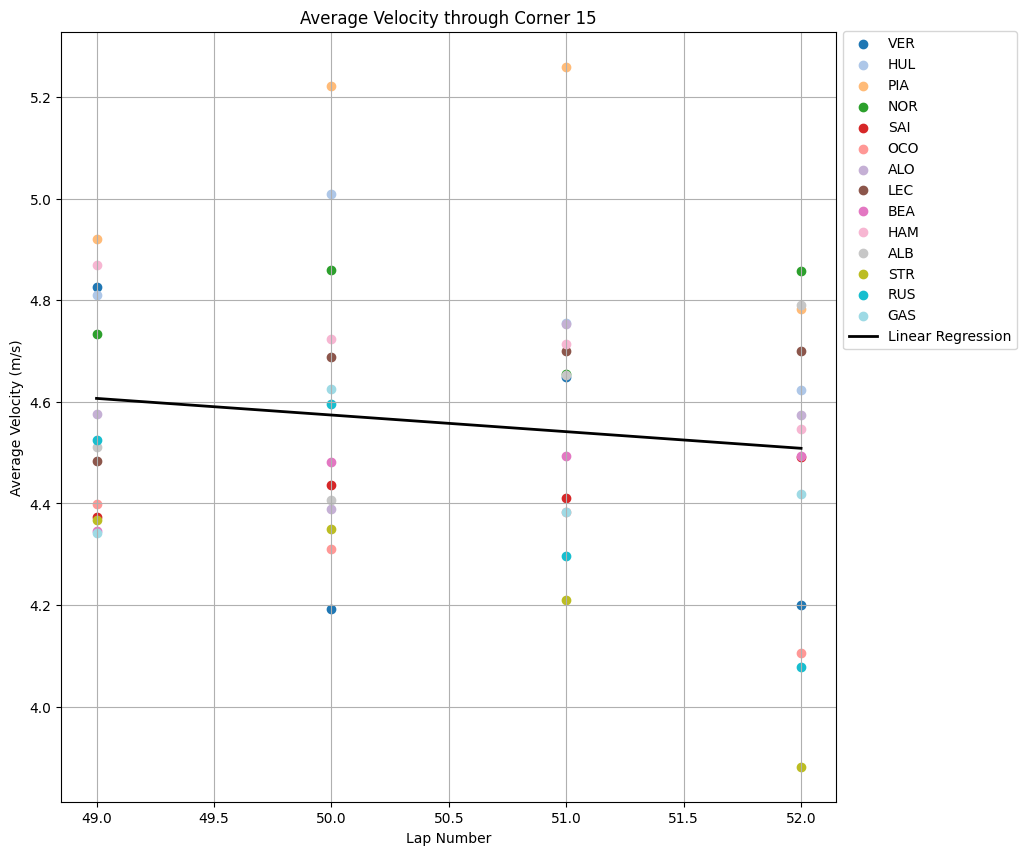

In [50]:
factor = 1 / (g * r)

colors = plt.cm.tab20(np.linspace(0, 1, len(Racing_data)))

plt.figure(figsize=(10, 10))
for i, driver in enumerate(Racing_data):
    color = colors[i]  
    for lap in Racing_data[driver]:
        velocity = average_velocity(
            Racing_data[driver][lap]["distance"],
            Racing_data[driver][lap]["time"],
            start=start_of_corner_15,
            end=end_of_corner_15
        )
        plt.scatter(int(lap), velocity**2 * factor, color=color, label=driver if lap == "49" else "")

plt.plot(lap_numbers, beta[0] + beta[1] * np.array(lap_numbers), color='black', label='Linear Regression', linewidth=2)


plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.legend(ncol=1, bbox_to_anchor=(1, 1.01))
plt.grid()
plt.show()

### 2d) Downforce
You probably got a pretty high friction coefficient. Usually friction coefficients for F1 tires go up to 1.7, and you most likely have something much higher right now. 
But do not worry, this is because we have not taken into account the downforce of the car. The downforce of the F1 cars play a huge role in the race, and we are now about to find out how much it contributes to the friction coefficient.

Earlier we said that the friction force is equal to the centripetal force. But now that we introduce the downforce, we can say that the centripetal force is equal to the sum of the friction force and the downforce force:
$$
F_c = F_f + F_d
$$

where $F_d = μ C_D v²$

Isolate $μ$ ...


### Find a function that returns the average velocity

Driver: VER
Lap: 49
Average velocity: 248.99 m/s
Lap: 50
Average velocity: 235.64 m/s
Lap: 51
Average velocity: 244.66 m/s
Lap: 52
Average velocity: 232.53 m/s
Driver: HUL
Lap: 49
Average velocity: 248.27 m/s
Lap: 50
Average velocity: 252.78 m/s
Lap: 51
Average velocity: 247.19 m/s
Lap: 52
Average velocity: 243.61 m/s
Driver: PIA
Lap: 49
Average velocity: 251.32 m/s
Lap: 50
Average velocity: 258.45 m/s
Lap: 51
Average velocity: 259.51 m/s
Lap: 52
Average velocity: 248.35 m/s
Driver: NOR
Lap: 49
Average velocity: 246.37 m/s
Lap: 50
Average velocity: 249.63 m/s
Lap: 51
Average velocity: 244.08 m/s
Lap: 52
Average velocity: 249.74 m/s
Driver: SAI
Lap: 49
Average velocity: 237.11 m/s
Lap: 50
Average velocity: 238.82 m/s
Lap: 51
Average velocity: 237.70 m/s
Lap: 52
Average velocity: 241.01 m/s
Driver: OCO
Lap: 49
Average velocity: 237.30 m/s
Lap: 50
Average velocity: 235.89 m/s
Lap: 51
Average velocity: 237.05 m/s
Lap: 52
Average velocity: 229.91 m/s
Driver: ALO
Lap: 49
Average velocity: 24

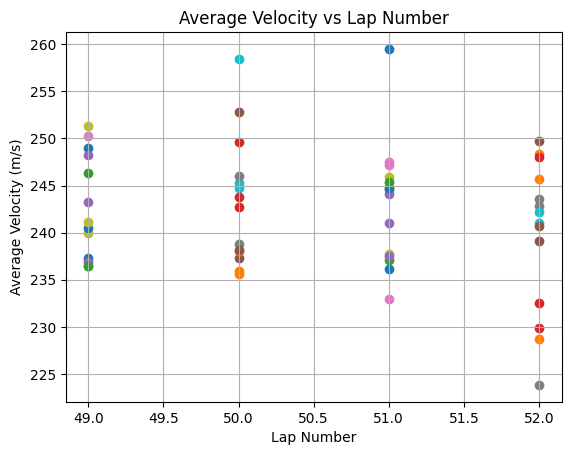

In [22]:
def average_velocity(data, start_of_corner = 4840.210, end_of_corner=5151.193):
    """
    Calculate the average velocity between two points in the data.
    
    Parameters:
    - data: list of dictionaries containing 'time' and 'speed'
    # - start: index of the starting point
    # - end: index of the ending point
    
    Returns:
    - Average velocity between start and end points
    """
    start_idx = np.where(np.array(data['distance']) >= start_of_corner)[0][0]
    end_idx = np.where(np.array(data['distance']) <= end_of_corner)[0][-1]
    
    velocities = np.array([data['speed'][i] for i in range(start_idx, end_idx + 1)])
    average_velocity = np.mean(velocities)
    return average_velocity



for driver in Racing_data.items():
    print(f"Driver: {driver[0]}")
    for lap in driver[1].items():
        print(f"Lap: {lap[0]}")
        avg_velocity = average_velocity(lap[1])
        print(f"Average velocity: {avg_velocity:.2f} m/s")
        # scatter plot the avg velocity vs lap number
        plt.scatter(int(lap[0]), avg_velocity, label=driver[0])
plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity vs Lap Number")
# plt.legend()
plt.grid()
plt.show()

### equation 1 
$mv²/r = μ mg$

$μ = v²\frac{g}{r}$

### equation 2 
$mv²/r = μ(mg + C_D v²)$

$μ = mv²/(r(mg + C_D v²))$

Manual OLS result: μ = -0.417627 * lap + 81.508566


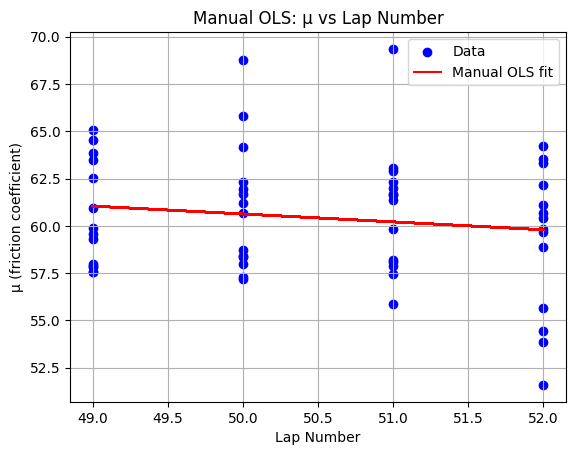

In [ ]:
mass = 800  # kg
g = 9.81  # m/s^2


# Step 1: Collect data
lap_numbers = []
mus = []

g = 9.81

for driver, laps in Racing_data.items():
    for lap_num, lap_data in laps.items():
        v = average_velocity(lap_data)
        mu = v**2 / (radius * g)
        lap_numbers.append(int(lap_num))
        mus.append(mu)

# Convert to numpy arrays
x = np.array(lap_numbers)# print(Design_matrix)

y = np.array(mus)

# Step 2: Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Step 3: Compute slope (a) and intercept (b)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

a = numerator / denominator
b = y_mean - a * x_mean

print(f"Manual OLS result: μ = {a:.6f} * lap + {b:.6f}")

# Step 4: Predict and plot
y_pred = a * x + b

plt.scatter(x, y, label="Data", color='blue')
plt.plot(x, y_pred, color='red', label="Manual OLS fit")
plt.xlabel("Lap Number")
plt.ylabel("μ (friction coefficient)")
plt.title("Manual OLS: μ vs Lap Number")
plt.legend()
plt.grid()
plt.show()



Manual OLS with downforce: μ = -0.000333 * lap + 1.631806


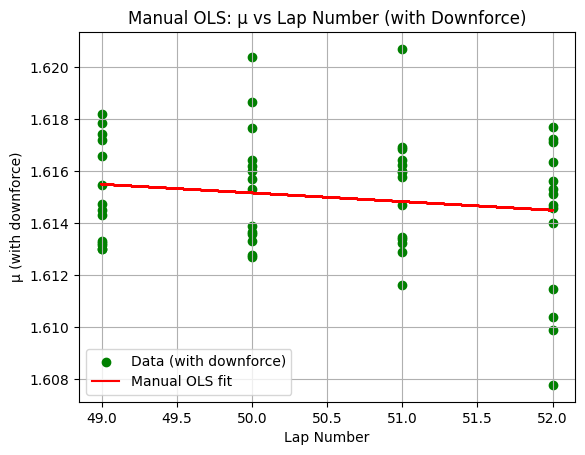

In [37]:

# Constants
g = 9.81              # gravity
m = 800.0             # mass of car in kg
C_D = 4.87             # downforce coefficient, conservative F1 value

lap_numbers = []
mu_with_downforce = []

for driver, laps in Racing_data.items():
    for lap_num, lap_data in laps.items():
        v = average_velocity(lap_data)
        numerator = m * v**2
        denominator = radius * (m * g + C_D * v**2)
        mu = numerator / denominator
        lap_numbers.append(int(lap_num))
        mu_with_downforce.append(mu)

# Convert to numpy arrays
x = np.array(lap_numbers)
y = np.array(mu_with_downforce)

# Manual OLS
x_mean = np.mean(x)
y_mean = np.mean(y)

a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - a * x_mean

print(f"Manual OLS with downforce: μ = {a:.6f} * lap + {b:.6f}")

# Predictions
y_pred = a * x + b

# Plotting
plt.scatter(x, y, label="Data (with downforce)", color='green')
plt.plot(x, y_pred, color='red', label="Manual OLS fit")
plt.xlabel("Lap Number")
plt.ylabel("μ (with downforce)")
plt.title("Manual OLS: μ vs Lap Number (with Downforce)")
plt.legend()
plt.grid()
plt.show()
